<a href="https://colab.research.google.com/github/208B1A0428/DATA-STRUCTURES/blob/master/Handwritten_recoginization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import required Libraries**

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import seaborn as sns
from PIL import Image
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
tf.random.set_seed(3)

**Load the Dataset**

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


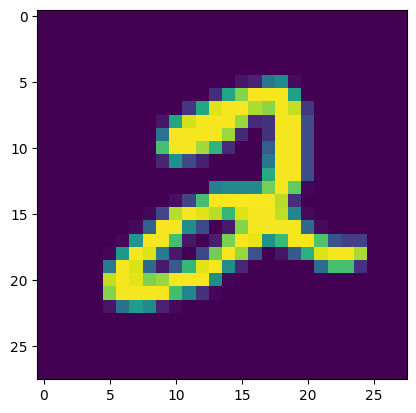

2


In [ ]:
plt.imshow(x_train[5])
plt.show()
print(y_train[5])

**Scaling process**

In [ ]:
x_train=x_train/255
x_test=x_test/255
print(x_train[3])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Training section**

In [ ]:
from keras.api._v2.keras import activations
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3045 - accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1381 - accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1001 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0824 - accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0671 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0579 - accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0389 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.035

**Testing Section**

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.9734
0.9733999967575073


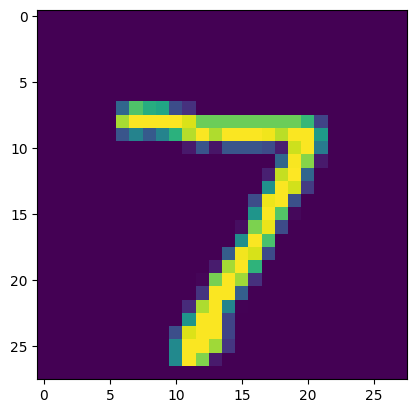

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_predict=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(y_predict.shape)

(10000, 10)


In [ ]:
print(y_predict[0])

[2.6280447e-04 2.4598021e-02 1.7332727e-01 9.6673459e-01 5.4287698e-06
 6.7427284e-03 3.2242167e-06 9.9999899e-01 3.0491943e-03 6.0758173e-02]


In [ ]:
label_for_first_image=np.argmax(y_predict[0])
print(label_for_first_image)

7


In [ ]:
y_pred_labels=[np.argmax(i) for i in y_predict]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 7, 4, 2, 0, 7, 1, 1, 2, 1, 

**Confusion Matrix**

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    3,    5,    2,    4,    0],
       [   0, 1122,    1,    0,    0,    2,    2,    1,    7,    0],
       [   2,    4,  992,    8,    3,    0,    4,    2,   17,    0],
       [   0,    1,    4,  980,    0,   11,    0,    2,    7,    5],
       [   1,    1,    3,    1,  953,    2,    3,    2,    3,   13],
       [   1,    0,    0,    4,    1,  872,    5,    1,    6,    2],
       [   4,    3,    2,    1,    3,    7,  934,    0,    4,    0],
       [   1,    4,    9,    2,    3,    0,    0, 1000,    4,    5],
       [   0,    0,    1,    6,    3,    7,    1,    1,  947,    8],
       [   1,    2,    0,    8,   12,    4,    1,    6,    4,  971]],
      dtype=int32)>

**HEAT MAP**

Text(0.5, 47.7222222222222, 'Predicted Labels')

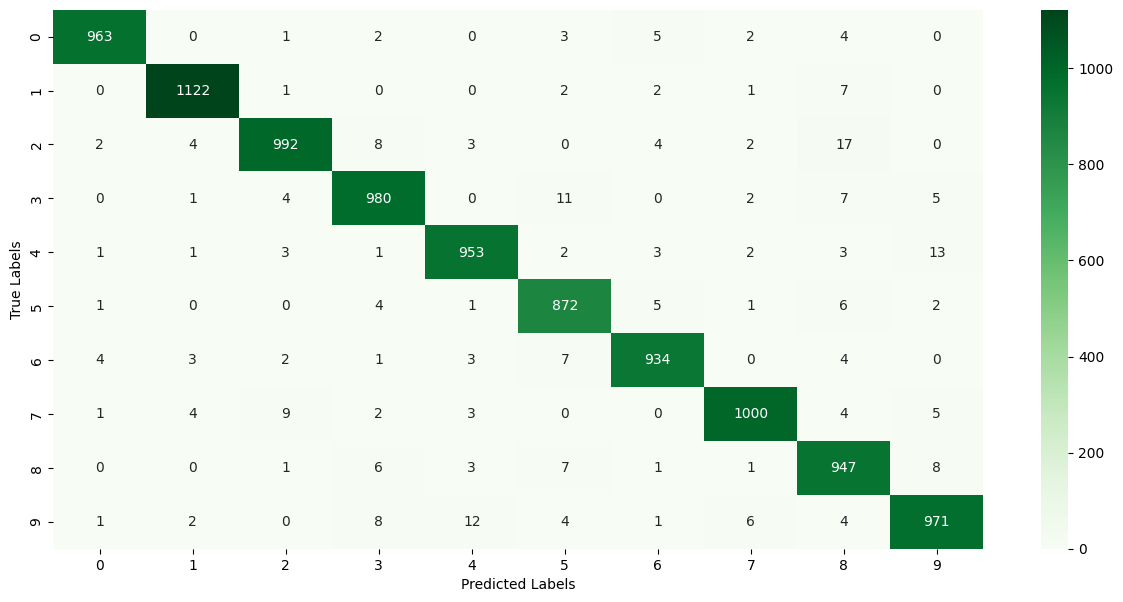

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Greens')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
input_image_path="/content/sample_image.webp"
input_image=cv2.imread(input_image_path)
input_image

array([[[250, 250, 250],
        [250, 250, 250],
        [198, 198, 198],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [255, 255, 255]],

       [[250, 250, 250],
        [250, 250, 250],
        [198, 198, 198],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [255, 255, 255]],

       [[198, 198, 198],
        [198, 198, 198],
        [  0,   0,   0],
        ...,
        [198, 198, 198],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[228, 228, 228],
        [228, 228, 228],
        [  0,   0,   0],
        ...,
        [228, 228, 228],
        [255, 255, 255],
        [255, 255, 255]],

       [[221, 221, 221],
        [221, 221, 221],
        [  0,   0,   0],
        ...,
        [221, 221, 221],
        [255, 255, 255],
        [255, 255, 255]],

       [[221, 221, 221],
        [221, 221, 221],
        [  0,   0,   0],
        ...,
        [221, 221, 221],
        [255, 255, 255],
        [255, 255, 255]]

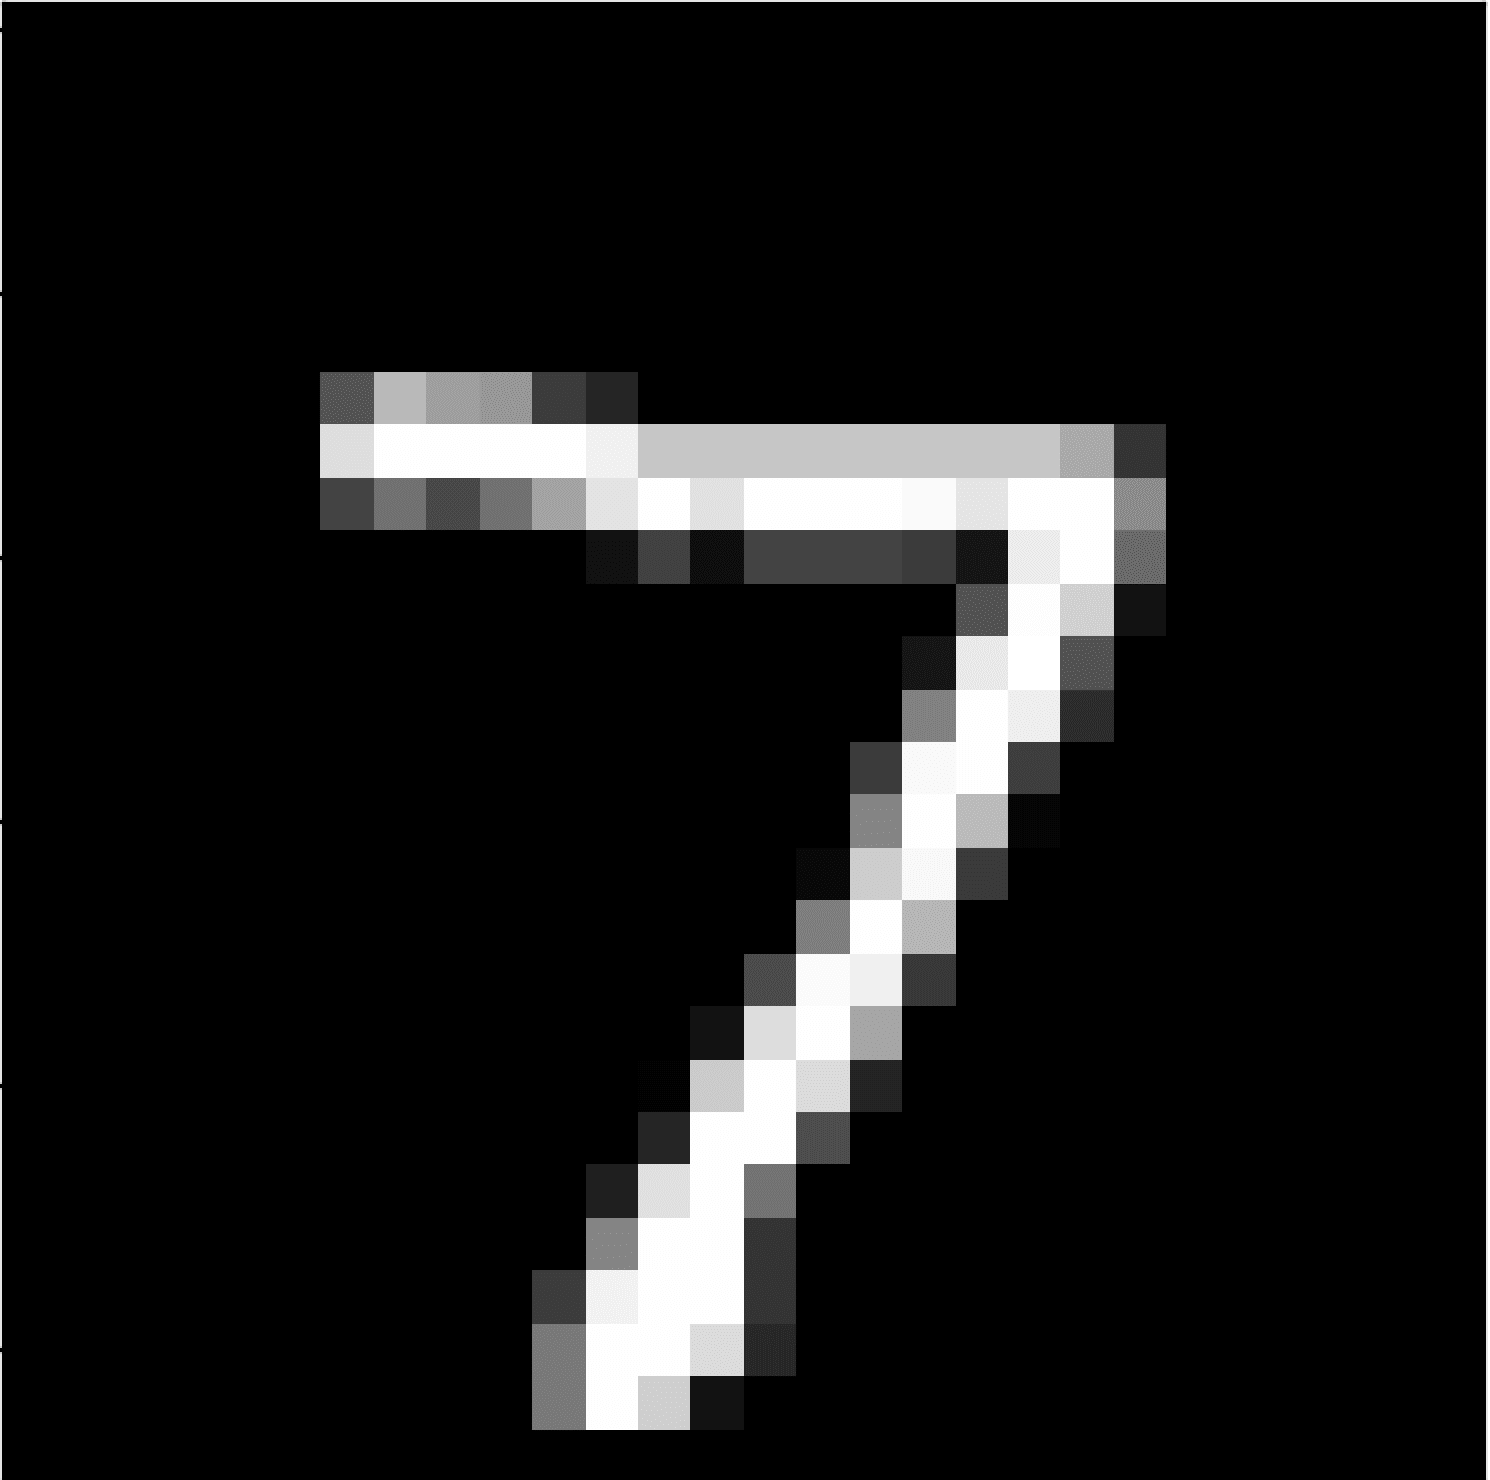

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(1480, 1490, 3)

In [ ]:
gray_scale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
input_image_resize=cv2.resize(gray_scale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_pred=model.predict(image_reshaped)
print(input_pred)

1/1 [==============================] - 0s 26ms/step
[[2.7306224e-04 2.4797842e-02 1.7627901e-01 9.6541119e-01 5.6257650e-06
  6.7056604e-03 3.3775962e-06 9.9999899e-01 3.0300801e-03 6.1350558e-02]]


In [ ]:
input_pred_label=np.argmax(input_pred)
print(input_pred_label)

7


**conclusion**

Path of the image to be predicted: /content/hand written images1.jpeg


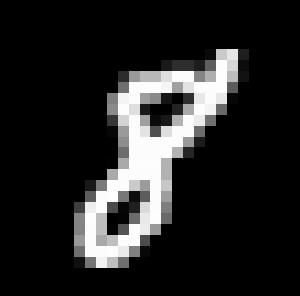

1/1 [==============================] - 0s 108ms/step
The Handwritten Digit is recognised as  8


In [ ]:
input_image_path=input("Path of the image to be predicted: ")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
gray_scale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(gray_scale,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_pred=model.predict(image_reshaped)
input_pred_label=np.argmax(input_pred)
print('The Handwritten Digit is recognised as ',input_pred_label)